In [2]:
import pandas as pd, numpy as np
from datetime import datetime
import psycopg2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def all_assts_from_sql(asst1, asst2, asst3, asst4, asst5, asst6, asst7, asst8, sql_limit_num, location, till_date):
    conn = psycopg2.connect(database="bitmexdata", user="postgres", password="tongKen123", host="128.199.97.202",
                            port="5432")
    asset1 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst1,
                                                                                                    sql_limit_num)
    asset2 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst2,
                                                                                                    sql_limit_num)
    asset3 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst3,
                                                                                                    sql_limit_num)
    asset4 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst4,
                                                                                                    sql_limit_num)
    asset5 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst5,
                                                                                                    sql_limit_num)
    asset6 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst6,
                                                                                                    sql_limit_num)
    asset7 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst7,
                                                                                                    sql_limit_num)
    asset8 = "SELECT time, open, high, low, close, volume from {} order by id desc limit {}".format(asst8,
                                                                                                    sql_limit_num)
    df1 = pd.read_sql(asset1, con=conn)
    df2 = pd.read_sql(asset2, con=conn)
    df3 = pd.read_sql(asset3, con=conn)
    df4 = pd.read_sql(asset4, con=conn)
    df5 = pd.read_sql(asset5, con=conn)
    df6 = pd.read_sql(asset6, con=conn)
    df7 = pd.read_sql(asset7, con=conn)
    df8 = pd.read_sql(asset8, con=conn)
    conn.close()
    #     return df1, df2, df3, df4, df5, df6, df7, df8
    df1.to_csv(location + "{}".format(till_date) + asst1 + ".csv", index=False)
    df2.to_csv(location + "{}".format(till_date) + asst2 + ".csv", index=False)
    df3.to_csv(location + "{}".format(till_date) + asst3 + ".csv", index=False)
    df4.to_csv(location + "{}".format(till_date) + asst4 + ".csv", index=False)
    df5.to_csv(location + "{}".format(till_date) + asst5 + ".csv", index=False)
    df6.to_csv(location + "{}".format(till_date) + asst6 + ".csv", index=False)
    df7.to_csv(location + "{}".format(till_date) + asst7 + ".csv", index=False)
    df8.to_csv(location + "{}".format(till_date) + asst8 + ".csv", index=False)


# standardize and reset the price:
# file_suffix example: 'z18_1d.csv'
# added_note example: 'u18z18乘'
# till_date example: '11_10_'
def reset_price(location, till_date, file_suffix, added_note):
    symlist = ['ada', 'bch', 'eth', 'eos', 'trx', 'xrp', 'ltc']

#     for s in symlist:
#         if s == 'ada':
#             c = 10000000
#         elif s == 'bch':
#             c = 1000
#         elif s == 'eos':
#             c = 100000
#         elif s == 'eth' or s == 'ltc':
#             c = 10000
#         elif s == 'trx':
#             c = 100000000
#         elif s == 'xrp':
#             c = 10000000
    for s in symlist:
        if s == 'ada':
            c = 100000000 #
        elif s == 'bch':
            c = 10000 #
        elif s == 'eos':
            c = 1000000 #
        elif s == 'eth':
            c = 10000
        elif s == 'ltc':
            c = 100000 #
        elif s == 'trx':
            c = 100000000
        elif s == 'xrp':
            c = 10000000
            
        # b = pd.read_csv(location + till_date + s + file_suffix,header=None)
        b = pd.read_csv(location + "{}".format(till_date) + s + file_suffix + ".csv")
        b.iloc[:, [1, 2, 3, 4]] = b.iloc[:, [1, 2, 3, 4]].astype(float)
        b.iloc[:, [1, 2, 3, 4]] = (b.iloc[:, [1, 2, 3, 4]]) * c
        b.to_csv(location + 'res_' + till_date + s + file_suffix + '.csv',
                 sep=',', header=False, index=False, float_format='%.4f')


location = "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/extracting_and_transforming_data/"
till_date = "12_03_og_all_hundreds_"
frequency = "_1d"
file_suffix = 'u18z18' + frequency
added_note = 'u18z18'

all_assts_from_sql("ada" + file_suffix, "bch" + file_suffix, "eos" + file_suffix,
                   "eth" + file_suffix, "ltc" + file_suffix, "trx" + file_suffix,
                   "xbtusd" + frequency, "xrp" + file_suffix, 1000,
                   "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/extracting_and_transforming_data/",
                   till_date)

reset_price(location, till_date, file_suffix, added_note)

# ada_df = pd.read_csv(location + "res_" + till_date + "ada" + added_note + "10000000.csv", engine="python", header=None)
# bch_df = pd.read_csv(location + "res_" + till_date + "bch" + added_note + "1000.csv", engine="python", header=None)
# eos_df = pd.read_csv(location + "res_" + till_date + "eos" + added_note + "100000.csv", engine="python", header=None)
# eth_df = pd.read_csv(location + "res_" + till_date + "eth" + added_note + "10000.csv", engine="python", header=None)
# ltc_df = pd.read_csv(location + "res_" + till_date + "ltc" + added_note + "10000.csv", engine="python", header=None)
# trx_df = pd.read_csv(location + "res_" + till_date + "trx" + added_note + "100000000.csv", engine="python", header=None)
# xrp_df = pd.read_csv(location + "res_" + till_date + "xrp" + added_note + "10000000.csv", engine="python", header=None)
btc_df = pd.read_csv(location + till_date + "xbtusd" + frequency + ".csv", engine="python", header=None)
btc_df = btc_df.iloc[1:, :]
btc_df.to_csv(location + "res_" + till_date + "xbtusd" + frequency + ".csv",
              sep=',', header=False, index=False, float_format='%.4f')

In [3]:
string = "12_06_"

In [4]:
location = "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/extracting_and_transforming_data/"

ada_df = pd.read_csv(location + "res_{}og_all_hundreds_adau18z18_1d.csv".format(string), engine="python", header=None)
bch_df = pd.read_csv(location + "res_{}og_all_hundreds_bchu18z18_1d.csv".format(string), engine="python", header=None)
eos_df = pd.read_csv(location + "res_{}og_all_hundreds_eosu18z18_1d.csv".format(string), engine="python", header=None)
eth_df = pd.read_csv(location + "res_{}og_all_hundreds_ethu18z18_1d.csv".format(string), engine="python", header=None)
ltc_df = pd.read_csv(location + "res_{}og_all_hundreds_ltcu18z18_1d.csv".format(string), engine="python", header=None)
trx_df = pd.read_csv(location + "res_{}og_all_hundreds_trxu18z18_1d.csv".format(string), engine="python", header=None)
btc_df = pd.read_csv(location + "res_{}og_all_hundreds_xbtusd_1d.csv".format(string), engine="python", header=None)
xrp_df = pd.read_csv(location + "res_{}og_all_hundreds_xrpu18z18_1d.csv".format(string), engine="python", header=None)

In [5]:
def return_close(df):
    df.columns = ['time', 'open', 'high', 'low', 'close', 'vol']
    df.index = df['time']
    close = df['close']
    return close

ada_close = pd.DataFrame(return_close(ada_df))
bch_close = pd.DataFrame(return_close(bch_df))
eos_close = pd.DataFrame(return_close(eos_df))
eth_close = pd.DataFrame(return_close(eth_df))
ltc_close = pd.DataFrame(return_close(ltc_df))
trx_close = pd.DataFrame(return_close(trx_df))
btc_close = pd.DataFrame(return_close(btc_df))
xrp_close = pd.DataFrame(return_close(xrp_df))

# ada_close.index = pd.to_datetime(ada_close.index)
# bch_close.index = pd.to_datetime(bch_close.index)
# eos_close.index = pd.to_datetime(eos_close.index)
# eth_close.index = pd.to_datetime(eth_close.index)
# ltc_close.index = pd.to_datetime(ltc_close.index)
# trx_close.index = pd.to_datetime(trx_close.index)
# btc_close.index = pd.to_datetime(btc_close.index)
# xrp_close.index = pd.to_datetime(xrp_close.index)

# ada_close.reset_index(inplace = True)
# bch_close.reset_index(inplace = True)
# eos_close.reset_index(inplace = True)
# eth_close.reset_index(inplace = True)
# ltc_close.reset_index(inplace = True)
# trx_close.reset_index(inplace = True)
# btc_close.reset_index(inplace = True)
# xrp_close.reset_index(inplace = True)

ada_close.sort_index(inplace=True)
bch_close.sort_index(inplace=True)
eos_close.sort_index(inplace=True)
eth_close.sort_index(inplace=True)
ltc_close.sort_index(inplace=True)
trx_close.sort_index(inplace=True)
btc_close.sort_index(inplace=True)
xrp_close.sort_index(inplace=True)

ada_close['pct_chg'] = ada_close['close'].pct_change()
bch_close['pct_chg'] = bch_close['close'].pct_change()
eos_close['pct_chg'] = eos_close['close'].pct_change()
eth_close['pct_chg'] = eth_close['close'].pct_change()
ltc_close['pct_chg'] = ltc_close['close'].pct_change()
trx_close['pct_chg'] = trx_close['close'].pct_change()
btc_close['pct_chg'] = btc_close['close'].pct_change()
xrp_close['pct_chg'] = xrp_close['close'].pct_change()

In [6]:
def bollinger_bands_mean(stock_price, window_size, num_of_std):

    rolling_mean = stock_price.ewm(span=window_size).mean()
    rolling_std  = stock_price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)
    return rolling_mean
# m = bollinger_bands_mean(qqq_spy, 40, 2)


def bollinger_bands_upper(stock_price, window_size, num_of_std):

    rolling_mean = stock_price.ewm(span=window_size).mean()
    rolling_std  = stock_price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)
    return upper_band
# u = bollinger_bands_upper(qqq_spy, 40, 2)


def bollinger_bands_lower(stock_price, window_size, num_of_std):

    rolling_mean = stock_price.ewm(span=window_size).mean()
    rolling_std  = stock_price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)
    return lower_band

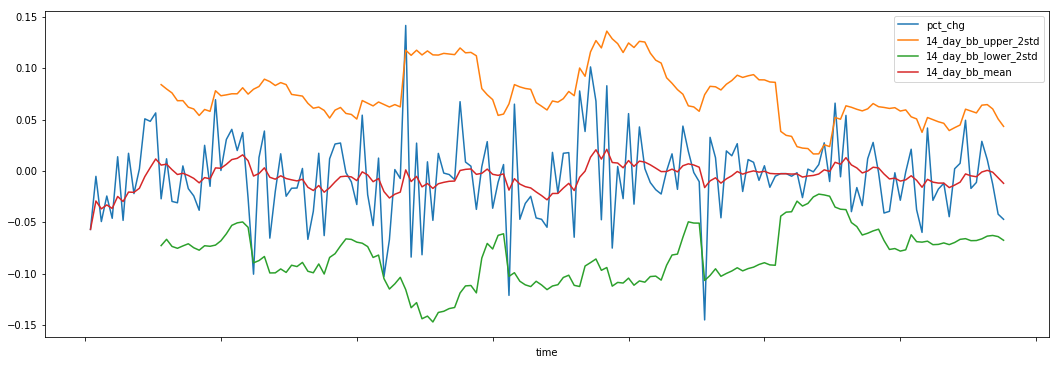

In [7]:
window_size = 14
num_of_std = 2

ada_close['{}_day_bb_upper_{}std'.format(window_size, num_of_std)] = bollinger_bands_upper(ada_close['pct_chg'], window_size, num_of_std)
ada_close['{}_day_bb_mean'.format(window_size)] = bollinger_bands_mean(ada_close['pct_chg'], window_size, num_of_std)
ada_close['{}_day_bb_lower_{}std'.format(window_size, num_of_std)] = bollinger_bands_lower(ada_close['pct_chg'], window_size, num_of_std)

ada_close[['pct_chg', '14_day_bb_upper_{}std'.format(num_of_std), '14_day_bb_lower_{}std'.format(num_of_std), '{}_day_bb_mean'.format(window_size)]].plot(figsize = (18, 6))

In [8]:
def plot_mean_reversion(ada_close, window_size, num_of_std):
    ada_close['{}_day_bb_upper_{}std'.format(window_size, num_of_std)] = bollinger_bands_upper(ada_close['pct_chg'], window_size, num_of_std)
    ada_close['{}_day_bb_mean'.format(window_size)] = bollinger_bands_mean(ada_close['pct_chg'], window_size, num_of_std)
    ada_close['{}_day_bb_lower_{}std'.format(window_size, num_of_std)] = bollinger_bands_lower(ada_close['pct_chg'], window_size, num_of_std)
    ada_close[['pct_chg', '14_day_bb_upper_{}std'.format(num_of_std), '14_day_bb_lower_{}std'.format(num_of_std), '{}_day_bb_mean'.format(window_size)]].plot(figsize = (18, 6))

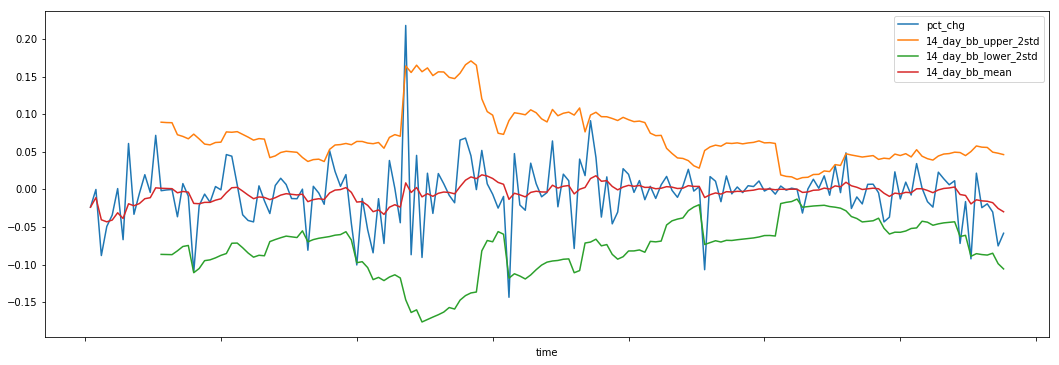

In [36]:
plot_mean_reversion(eos_close, window_size, num_of_std)

In [10]:
def PPSR(df):
    """
        Pivot Points, Supports and Resistances
        
        http://stockcharts.com/docs/doku.php?id=scans:indicators
    """
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3, name="PP")
    R1 = pd.Series(2 * PP - df['Low'], name="R1")
    S1 = pd.Series(2 * PP - df['High'], name="S1")
    R2 = pd.Series(PP + df['High'] - df['Low'], name="R2")
    S2 = pd.Series(PP - df['High'] + df['Low'], name="S2")
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']), name="R3")
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP), name="S3")
    return PP, R1, S1, R2, S2, R3, S3

In [16]:
ltc_df_chg_col = ltc_df.copy() 

In [19]:
ltc_df_chg_col.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Vol']

In [23]:
ltc_df_chg_col.sort_values('Time', ascending=True, inplace=True)

In [26]:
PP, R1, S1, R2, S2, R3, S3 = PPSR(ltc_df_chg_col)

In [28]:
ltc_df_chg_col['PP'] = PP
ltc_df_chg_col['R1'] = R1
ltc_df_chg_col['S1'] = S1
ltc_df_chg_col['R2'] = R2
ltc_df_chg_col['S2'] = S2
ltc_df_chg_col['R3'] = R3
ltc_df_chg_col['S3'] = S3

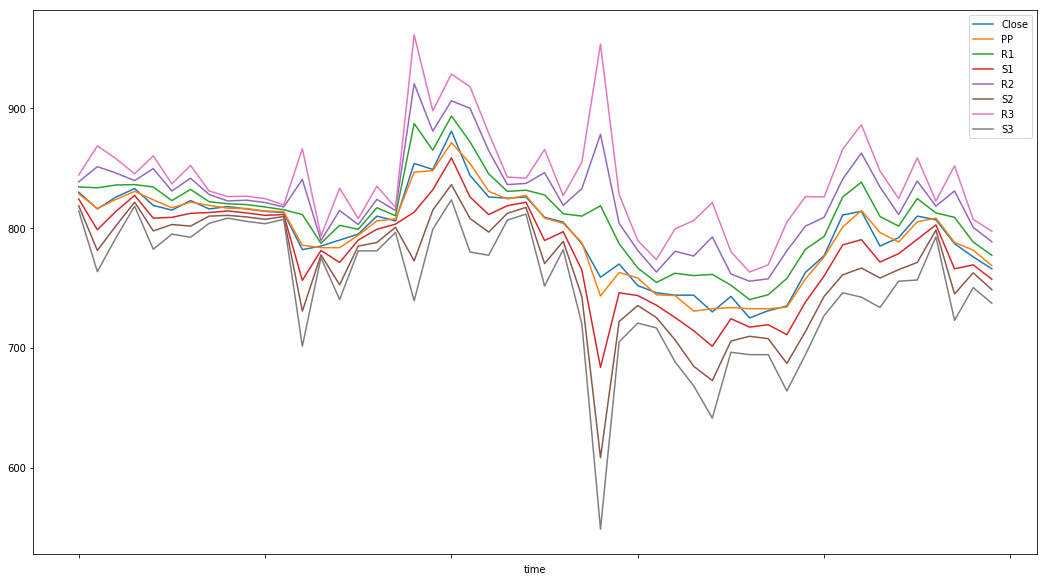

In [35]:
ltc_df_chg_col[['Close', 'PP', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3']].tail(50).plot(figsize = (18, 10))